In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [2]:
superstore = pd.read_csv('Superstore.csv')

2. Use the Superstore data. Create a dataframe that sorts average sales by state in descending order. 
What's the highest average sales in a state? Round to nearest whole number.

In [3]:
superstore.groupby('State').mean(numeric_only = True).reset_index()[['State', 'Sales']].sort_values(by = 'Sales', ascending = False).round().head(10)

,State,Sales
7,District of Columbia,3219.0
45,Washington,1577.0
19,Massachusetts,1242.0
3,California,1222.0
39,South Dakota,1192.0
30,New York,1136.0
8,Florida,1119.0
36,Pennsylvania,1097.0
0,Alabama,1014.0
12,Indiana,1003.0


3. Use the Superstore data. Create a dataframe that sorts total profit by category in descending order. 
What's the highest total profit for a category? Round to nearest whole number.

In [4]:
superstore.groupby('Category').sum().reset_index()[['Category', 'Profit']].sort_values(by = 'Profit', ascending = False).round().head(10)

,Category,Profit
16,Telephones and Communication,297944
1,Binders and Binder Accessories,226582
9,Office Machines,168079
3,Chairs & Chairmats,165341
5,Copiers and Fax,129154
0,Appliances,121641
8,Office Furnishings,92216
4,Computer Peripherals,87911
6,Envelopes,46133
10,Paper,35360


4. Use the Superstore data. Create a dataframe that sorts total sales by category and region in descending order. 
What's the highest total sales for a combination of category and region? Round to nearest whole number.

In [5]:
superstore.groupby(['Category', 'Region']).sum().reset_index()[['Category', 'Region', 'Sales']].sort_values(by = 'Sales', ascending = False).round().head(10)

,Category,Region,Sales
13,Chairs & Chairmats,East,478931
61,Tables,East,410619
65,Telephones and Communication,East,402051
64,Telephones and Communication,Central,359778
39,Office Machines,West,347529
37,Office Machines,East,320122
12,Chairs & Chairmats,Central,318369
5,Binders and Binder Accessories,East,314626
36,Office Machines,Central,278554
38,Office Machines,South,272450


5. Use the Superstore data. Create a dataframe that sorts total sales by postal code in descending order.
How many postal codes have total sales over $100,000?

In [6]:
Q5dat = superstore.groupby('Postal Code').sum().reset_index()[['Postal Code', 'Sales']].sort_values(by = 'Sales', ascending = False).round().head(10)

Q5dat = Q5dat[Q5dat['Sales'] > 100000]
Q5dat
len(Q5dat)

8

6. Use the Superstore data. Create a dataframe that shows the maximum transaction value (sales) for each category. 
What's the maximum transaction value (sales) for the envelopes category? 

In [7]:
Q6dat = superstore.groupby('Category').max().reset_index()[['Category', 'Sales']].sort_values(by = 'Sales', ascending = False).round()

Q6dat[Q6dat['Category'] == 'Envelopes']

,Category,Sales
6,Envelopes,23161


7. Use the Superstore data. Create a dataframe that shows total order quantity by item ID in the central region. 
What's the item ID with the most order quantity in the central region? 

In [8]:
superstore[superstore['Region'] == 'Central'].groupby('Item ID').sum()['Order Quantity'].reset_index().sort_values(by = 'Order Quantity', ascending = False).head(10)

,Item ID,Order Quantity
774,10962,276
457,10607,253
990,11197,193
647,10814,193
889,11090,192
1034,11245,175
188,10275,172
228,10332,172
567,10729,167
592,10756,161


8. Use the Superstore data. Create a new variable 'Profit_Margin' that is profit divided by sales.
Create a dataframe that sorts average profit margin by item ID in ascending order. 
What's the item ID of the product with lowest average profit margin?

In [9]:
superstore['Profit_Margin'] = superstore['Profit'] / superstore['Sales']

superstore.groupby('Item ID').mean(numeric_only = True)['Profit_Margin'].sort_values().reset_index()

,Item ID,Profit_Margin
0,11055,-131.743966
1,10912,-102.055358
2,10479,-41.222426
3,10177,-30.163899
4,10905,-29.332997
...,...,...
1258,10109,14.252404
1259,10458,16.624759
1260,10305,36.403371
1261,10438,60.257884


9. Use the Superstore data. Create a dataframe that sorts total sales by customer ID in descending order.
What's the customer ID of the customer whose total sales is ranked 100th highest? 
One way to use 'iloc' to find the value at a particular index. 
The other way is to use the rank function with method = 'min', ascending = False.
(see here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html).

In [10]:
Q9dat = superstore.groupby('Customer ID').sum()['Sales'].sort_values( ascending = False).reset_index()
Q9dat

,Customer ID,Sales
0,3075,123748
1,308,89272
2,2571,86541
3,2107,83651
4,553,81296
...,...,...
2698,1803,4
2699,422,3
2700,2425,3
2701,1414,3


In [11]:
Q9dat.iloc[99]

Customer ID     1734
Sales          15309
Name: 99, dtype: int64

10. Use the Superstore data. Create 2 new variables (Year and Month) using order date. 
Which combination of year and month has the highest total sales? 
Enter the answer as YYYYMM (e.g. If your answer is January 2021, enter 202101).

In [12]:
superstore['Month'] = pd.to_datetime(superstore['Order Date'], format = '%m/%d/%Y').dt.month
superstore['Year'] = pd.to_datetime(superstore['Order Date'], format = '%m/%d/%Y').dt.year

superstore.groupby(['Year', 'Month']).sum()['Sales'].sort_values(ascending = False).reset_index().head(10)

,Year,Month,Sales
0,2017,1,962382
1,2017,2,937995
2,2016,9,654533
3,2016,11,570133
4,2016,10,512752
5,2016,8,497684
6,2016,12,440553
7,2016,7,440284
8,2015,12,340171
9,2017,10,333868


11. Use the Superstore data. 
Create 3 dataframes that show the states by total sales, total profit, and total order quantity respectively. 
Join the 3 dataframes using join (e.g. df4 = df1.join(df2).join(df3)).
What's the value at index [25, 2]?

In [13]:
base11 = superstore.groupby('State').sum()
list11 = ['Sales', 'Profit', 'Order Quantity']

In [14]:
output11 = {}
for i in list11:
  output11["string{0}".format(i)] = base11[i].to_frame()

In [15]:
Q11dat = output11['stringSales'].join(output11['stringProfit'], lsuffix='_caller', rsuffix='_other').join(output11['stringOrder Quantity'], lsuffix='_caller', rsuffix='_other')
Q11dat.iloc[25,2]

697

In [16]:
Q11dat = Q11dat.reset_index()

In [17]:
temp = superstore.groupby('State').sum()[['Sales', 'Profit', 'Order Quantity']]
temp.head(10)

,Sales,Profit,Order Quantity
State,,,
Alabama,126716,10779,1416
Arizona,95031,30211,1284
Arkansas,94533,7453,1213
California,975048,80333,12576
Colorado,95359,19693,1269
Connecticut,229756,64073,3759
Delaware,3543,62,115
District of Columbia,218869,25513,2358
Florida,427410,26417,5163


In [18]:
Q11dat.head(10)

,State,Sales,Profit,Order Quantity
0,Alabama,126716,10779,1416
1,Arizona,95031,30211,1284
2,Arkansas,94533,7453,1213
3,California,975048,80333,12576
4,Colorado,95359,19693,1269
5,Connecticut,229756,64073,3759
6,Delaware,3543,62,115
7,District of Columbia,218869,25513,2358
8,Florida,427410,26417,5163
9,Georgia,188779,18502,2779


12. Use the dataframe created in Q11. Use sklearn. 
Use k-means to cluster the states by total sales, total profit, and total order quantity.
Use n_clusters=3, random_state=100, max_iter=100.
How many states belong to the largest cluster? 

Note: Different versions of Python and sklearn and processors may generate different results. 
If you don't get the question right, check you code. If you think your code and answer are correct, submit your answer as is. 
I will then grade it manually. 

In [19]:
Q12kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)

State = pd.get_dummies(data = Q11dat.State, drop_first = True, dtype = int)
metrics = Q11dat.drop(columns = ['State'])

xQ12 = pd.concat([metrics, State], axis = 1)

Q12kmeans.fit(xQ12)

C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, random_state=100)

In [20]:
pd.DataFrame(Q12kmeans.cluster_centers_, columns = xQ12.columns)

,Sales,Profit,Order Quantity,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,7.860883e+04,14211.228571,1114.000000,0.028571,0.028571,-1.387779e-17,0.028571,-1.387779e-17,0.028571,-1.387779e-17,...,0.028571,0.028571,-1.387779e-17,0.028571,0.028571,0.028571,-1.387779e-17,0.028571,0.028571,0.028571
1,1.021269e+06,115519.333333,16001.333333,0.000000,0.000000,3.333333e-01,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,3.333333e-01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,2.851736e+05,42587.636364,3915.454545,0.000000,0.000000,0.000000e+00,0.000000,9.090909e-02,0.000000,9.090909e-02,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.090909e-02,0.000000,0.000000,0.000000


In [21]:
pd.DataFrame(Q12kmeans.labels_).value_counts() #35 States

0    35
2    11
1     3
Name: count, dtype: int64

In [22]:
Q12dat = Q11dat
Q12dat['Cluster'] = Q12kmeans.labels_
Q12dat.head(10)

,State,Sales,Profit,Order Quantity,Cluster
0,Alabama,126716,10779,1416,0
1,Arizona,95031,30211,1284,0
2,Arkansas,94533,7453,1213,0
3,California,975048,80333,12576,1
4,Colorado,95359,19693,1269,0
5,Connecticut,229756,64073,3759,2
6,Delaware,3543,62,115,0
7,District of Columbia,218869,25513,2358,2
8,Florida,427410,26417,5163,2
9,Georgia,188779,18502,2779,2


In [23]:
Q12dat[Q12dat['Cluster'] == 0].reset_index()['State']

0            Alabama
1            Arizona
2           Arkansas
3           Colorado
4           Delaware
5              Idaho
6           Illinois
7            Indiana
8               Iowa
9             Kansas
10          Kentucky
11         Louisiana
12             Maine
13          Maryland
14         Minnesota
15       Mississippi
16          Missouri
17           Montana
18          Nebraska
19            Nevada
20     New Hampshire
21        New Jersey
22        New Mexico
23      North Dakota
24          Oklahoma
25      Rhode Island
26    South Carolina
27      South Dakota
28         Tennessee
29              Utah
30           Vermont
31          Virginia
32     West Virginia
33         Wisconsin
34           Wyoming
Name: State, dtype: object

13. Use the dataframe created in Q11. Use sklearn. 
Use k-means to cluster the states by total sales, total profit, and total order quantity.
Use n_clusters=3, random_state=100, max_iter=100.
What's the mean profit for the cluster with most states? Round to nearest whole number.

Note: Different versions of Python and sklearn and processors may generate different results. 
If you don't get the question right, check you code. If you think your code and answer are correct, submit your answer as is. 
I will then grade it manually. 

In [24]:
Q13dat = Q12dat
Q13dat[Q13dat['Cluster'] == 0].mean(numeric_only = True)['Profit'].round()

14211.0

14. Use the dataframe created in Q11. Use sklearn. 
Use k-means to cluster the states by total sales, total profit, and total order quantity.
Use n_clusters=3, random_state=100, max_iter=100.
Which states belong to the same cluster as Alabama? Choose all that apply. 

Note: Different versions of Python and sklearn and processors may generate different results. 
If you don't get the question right, check you code. If you think your code and answer are correct, submit your answer as is. 
I will then grade it manually. 

In [25]:
Q14dat = Q12dat
stateCheck = ['Alabama','Connecticut', 'California', 'Arkansas', 'Colorado', 'Arizona']
Q14dat[Q14dat['State'].isin(stateCheck)].sort_values(by = 'Cluster')[['State', 'Cluster']]

,State,Cluster
0,Alabama,0
1,Arizona,0
2,Arkansas,0
4,Colorado,0
3,California,1
5,Connecticut,2


15. Use the dataframe created in Q11. Use sklearn. 
Use k-means to cluster the states by total sales, total profit, and total order quantity.
Use random_state=100, max_iter=100.
Run the elbow method to choose the optimal number of clusters. How many clusters would you choose? 

Note: Different versions of Python and sklearn and processors may generate different results. 
If you don't get the question right, check you code. If you think your code and answer are correct, submit your answer as is. 
I will then grade it manually. 

In [26]:
maxK = 20
k = np.arange(1, maxK+1)
errors = []

In [27]:
for i in k:
  Q15kmeans = KMeans(n_clusters = i, random_state=100, max_iter=100)
  Q15kmeans.fit(xQ12) #Reusing var
  errors.append(Q15kmeans.inertia_)

C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [28]:
results = pd.DataFrame({'k': k, 'errors': errors})

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

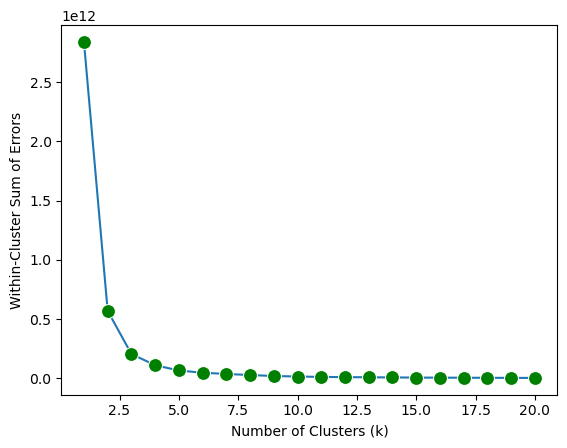

In [29]:
ax = sns.lineplot(x = 'k', y = 'errors', data = results, marker = 'o', markersize = 10, markerfacecolor = 'g')
ax.set(xlabel = 'Number of Clusters (k)', ylabel = 'Within-Cluster Sum of Errors')
plt.show()

16. Use the dataframe created in Q11. Use sklearn. 
Use GMM (Gaussian Mixture Models) to cluster the states by total sales, total profit, and total order quantity.
Use n_components=5, random_state=100, max_iter=100.
How many states belong to largest cluster? 

Note: Different versions of Python and sklearn and processors may generate different results. 
If you don't get the question right, check you code. If you think your code and answer are correct, submit your answer as is. 
I will then grade it manually. 

In [30]:
Q16dat = xQ12
gmm = GaussianMixture(covariance_type = 'diag', n_components = 5, random_state = 100, max_iter = 100)
gmm.fit(Q16dat)

C:\Users\Test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(covariance_type='diag', n_components=5, random_state=100)

In [31]:
clusters = pd.DataFrame(Q11dat)
clusters['Cluster'] = gmm.predict(Q16dat)
clusters.columns = ['State', 'Sales', 'Profit', 'Order Quantity', 'Cluster']
clusters['Cluster'].value_counts() #18 states

Cluster
2    18
0    16
4     9
3     3
1     3
Name: count, dtype: int64

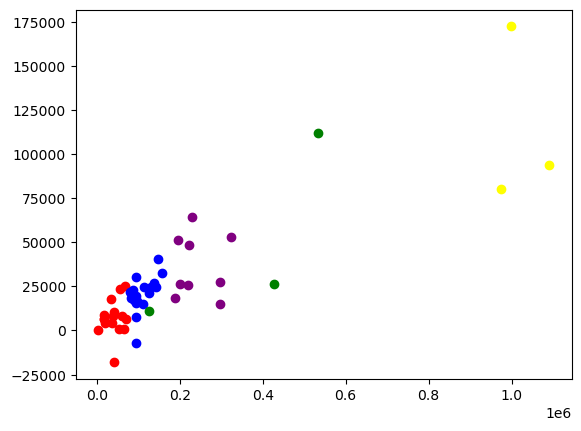

In [32]:
colors = ['red', 'yellow', 'blue', 'green', 'purple']

plt.clf()
for k in range(0, 5):
  data = clusters[clusters['Cluster'] == k]
  plt.scatter(data.Sales, data.Profit, c = colors[k])
plt.show()